# Testing the Samplers

In [28]:
#imports

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import multivariate_normal
import sys
import seaborn as sns
sys.path.append('../source/')
from MALA import MALA
from RWHM import Metropolis_Hastings

## Normal Distribution for the Data

In [29]:
# Parameters 

N = 30
mu = 0
sigma = 10
epsilon_sq = np.square(0.8)
N_steps = 200

In [30]:
# Generate data

X = np.random.normal(mu, sigma, N)

In [31]:
# Compute the posterior

def log_target(theta):
    sum = -N * (np.log(theta[1]) + 0.5 *np.log(2*np.pi)) - 0.5 * np.sum((X - theta[0])**2) / theta[1]**2
    return sum

def grad_log_target(theta):
    grad = np.zeros(2)
    grad[0] = np.sum(X - theta[0]) / theta[1]**2
    grad[1] = -N / theta[1] + np.sum((X - theta[0])**2) / theta[1]**3
    return grad

In [32]:
#start
mu_0 = 26
sigma_0 = 26

theta_0 = np.array([mu_0, sigma_0])

### RWHM

In [42]:
sigma_prop = 3
MH = Metropolis_Hastings(log_target,theta_0, sigma_prop)

sample_MH , acc_MH = MH.sample(N_steps)

print("Acceptance rate: ", acc_MH)

  0%|          | 0/200 [00:00<?, ?it/s]/tmp/ipykernel_126801/3433543691.py:4: RuntimeWarning: invalid value encountered in log
  sum = -N * (np.log(theta[1]) + 0.5 *np.log(2*np.pi)) - 0.5 * np.sum((X - theta[0])**2) / theta[1]**2
100%|██████████| 200/200 [00:00<00:00, 47831.04it/s]

Acceptance rate:  0.38


Text(0.5, 1.0, 'Regular MH')

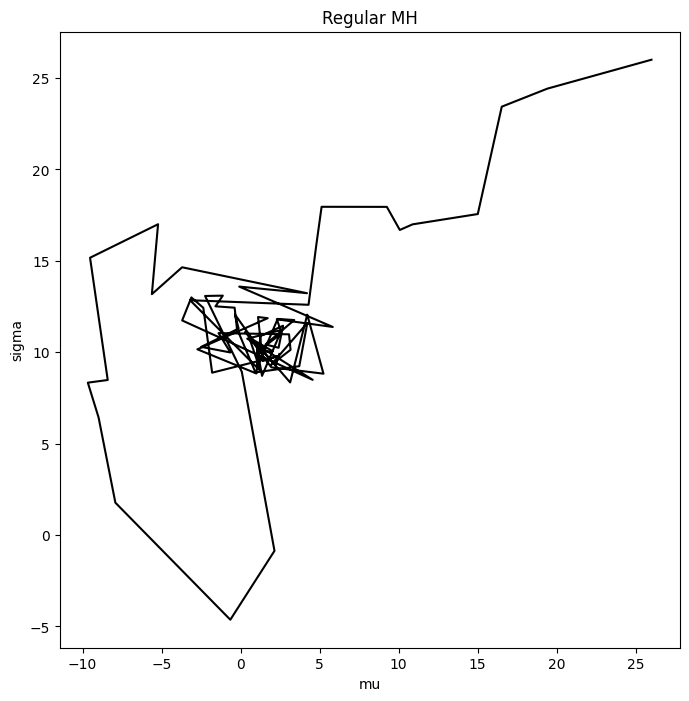

In [43]:
# Plot the path of the chain


plt.figure(figsize=(8,8))
plt.plot(sample_MH[:,0], sample_MH[:,1], '-', color='black', alpha=1)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Regular MH')

### MALA

In [35]:
# Apply regular MALA

regular_MALA = MALA(log_target, grad_log_target, epsilon_sq, theta_0)
sample, acceptance = regular_MALA.sample(N_steps)
print(acceptance)

Running MALA sampler...


100%|██████████| 200/200 [00:00<00:00, 20420.67it/s]

0.985


Text(0.5, 1.0, 'Regular MALA')

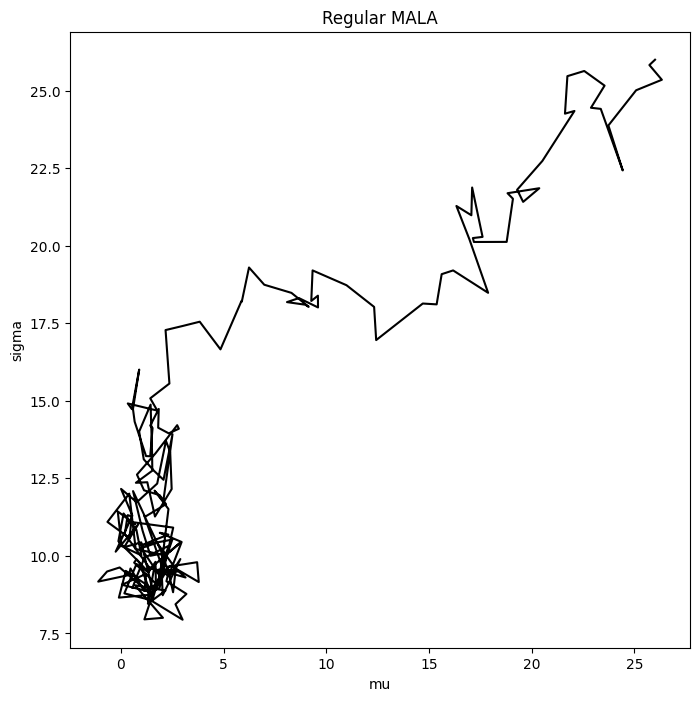

In [36]:
# Plot the path of the chain


plt.figure(figsize=(8,8))
plt.plot(sample[:,0], sample[:,1], '-', color='black', alpha=1)
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Regular MALA')